# MIS 6900 - HW2 - Excel type things with Python

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

Import the `whatif` module

In [4]:
from whatif import Model
from whatif import get_sim_results_df

## Analysis 1 - Basic Break-even Analysis

Problem description:

The owner of a relatively small business is trying to determine the breakeven level of sales of the company's single product. The fixed cost of manufacturing product each month is **\\$5,000**. The variable cost of producing this product is **\\$100** per unit. The current selling price is **\\$115**. Using historical data on selling price and monthly demand, the owner fit the folllowing function relating to demand and selling price:

$D = 0.06S^2 - 35S + 4900$

where *D* is the monthly demand for the product and *S* is the selling price. This is a 2nd order polynomial function. Let's call this equation the `Selling Price Function` (or `SPF`, for short).

### Base Model

In [136]:
class SingleProductSPF(Model):
    """Base model"""
    def __init__(self, fixed_cost = 5000, var_cost = 100, selling_price = 115, 
                 spf_constant = 4900, spf_linear = 35, spf_quadratic = 0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    
    def demand(self):
        demand = (self.spf_quadratic * (self.selling_price ** 2)) - (self.spf_linear * self.selling_price) + (self.spf_constant)
        return demand
    
    def total_cost(self):
        total_cost = (self.demand() * self.var_cost) + self.fixed_cost
        return total_cost
    
    def total_revenue(self):
        total_revenue = self.demand() * self.selling_price
        return total_revenue
    
    def profit(self):
        profit = self.total_revenue() - self.total_cost()
        return profit
    

Instantiating an instance of our SPF model and confirming that we're getting the correct demand and profit value with default parameters

In [137]:
model = SingleProductSPF()
print(f"Single product SPF model demand with selling price set at ${model.selling_price:,.2f} is: ${model.demand():,.2f}")
print(f"Single product SPF model profit with selling price set at ${model.selling_price:,.2f} is: ${model.profit():,.2f}")
print(f"Single product SPF model attributes: {model}")

Single product SPF model demand with selling price set at $115.00 is: $1,668.50
Single product SPF model profit with selling price set at $115.00 is: $20,027.50
Single product SPF model attributes: {'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': 35, 'spf_quadratic': 0.06}


### 1-Way Data Table

Creating a one-way data table using the inherited `data_table` function from Model (from the `whatif` package). We are using `selling_price` values from 80 to 140 (by steps of 10) as the input and outputting the `profit` and `demand`.

In [138]:
one_way_inputs = {'selling_price': np.arange(80, 141, 10)}
one_way_output = ['profit', 'demand']

one_way_df = model.data_table(one_way_inputs, one_way_output)
one_way_df

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


Graphing our 1-way data table dataframe.

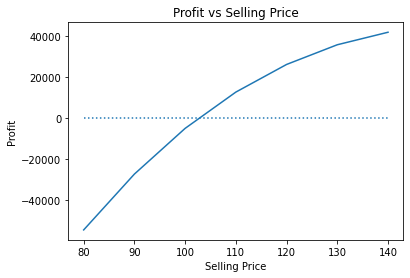

In [139]:
one_way_x = one_way_df['selling_price']
one_way_y = one_way_df['profit']

plt.xlabel('Selling Price')
plt.ylabel('Profit')

plt.hlines(y=0, xmin=min(one_way_df['selling_price']), xmax=max(one_way_df['selling_price']), linestyles='dotted')

plt.title('Profit vs Selling Price')

plt.plot(one_way_x, one_way_y)

plt.show()

The shape of the relationship between the selling price and profit looks like some degree polynomial. Profit does not increase linearly with selling price. We can see that as selling price increases, profit increases but at a decreasing rate. 

The result is that the "line" is curved, arching as selling price increases. It almost looks like 40%-45% of the left side of a rainbow.

In short, the relationship is nonlinear and this makes sense since our SPF (selling price function) is quadratic. Our SPF calculates the demand and demand is in turn used to calculate the profit. Not only is SPF quadratic, but it has a positive squared variable (0.06 * S ^ 2) and a negative linear variable (- 35 * S).

### Break-Even

Break-even selling price between \\$80 and \\$140.

In [140]:
print(f"Selling price (between $80 and $140) that gets us at the break-even point ($0) for profit: ${model.goal_seek('profit', 0, 'selling_price', 80, 140, 100):,.2f}")

Selling price (between $80 and $140) that gets us at the break-even point ($0) for profit: $102.58


### 2-Way Data Table

Let's create a 2-way data table using `selling_price` (\\$80 to \\$140, steps of \\$10), `var_cost` (\\$85 to \\$110, steps of \\$5) as the inputs and `profit` and `total_cost` as the outputs.

In [145]:
two_way_inputs = {'selling_price': np.arange(80, 141, 10),
                 'var_cost': np.arange(85, 111, 5)}
two_way_outputs = ['profit', 'total_cost']

two_way_df = model.data_table(two_way_inputs, two_way_outputs)
two_way_df

,selling_price,var_cost,profit,total_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0
5,80,110,-79520.0,278240.0
6,90,85,6180.0,195060.0
7,90,90,-5000.0,206240.0
8,90,95,-16180.0,217420.0
9,90,100,-27360.0,228600.0


Let's visualize how the selling price and variable cost affect the profit.

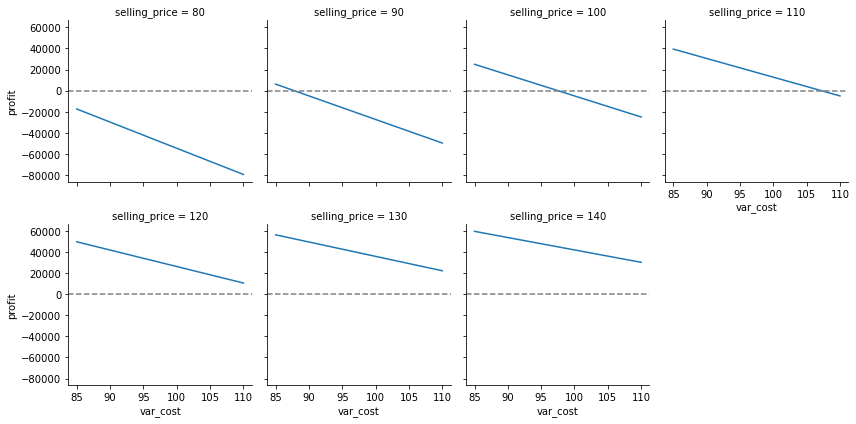

In [153]:
two_way_graph = sns.FacetGrid(two_way_df, col="selling_price", sharey=True, col_wrap=4)
two_way_graph = two_way_graph.map(plt.plot, "var_cost", "profit")
two_way_graph = two_way_graph.refline(y=0)

From this faceted plot, we can see that increasing the selling price increases the profit and that higher variable cost translates into less profit.

It's easy to see the negative linear relationship between variable cost (in this band) and profit since we have a downward sloped line. As for seeing how increasing selling price (at least in this band) increases the profits, we can see how the line (at each point) is higher going from 80 to 140 selling price in steps of 10 (notice the line is above the y=0 reference line).

### Digging Deeper

Redoing the Goal Seek but using \\$80-\\$250 instead

In [180]:
# Got an error from the below code so it's been commented out
# print(f"Selling price (between $80 and $140) that gets us at the break-even point ($0) for profit: ${model.goal_seek('profit', 0, 'selling_price', 80, 250, 2000):,.2f}")

print(model.goal_seek('profit', 0, 'selling_price', 80, 250, 100))
print(model.goal_seek('profit', 0, 'selling_price', 80, 250, 10000))

None
None


Looks like our bisection algorithm cannot find a root for the equation using a selling price between 80 and 250. This is the case even when we increase the number of iterations to 10,000. We can refer to https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/ to get a better understanding (as seen in `whatif.py`).

![bisection algorithm error](./images/Bisection_algorithm_error.png)

From this explanation, we can deduce that we had "either ... a bad initial interval or rounding error in computations." We can also look at the docstrings for further explanation on our interval/bounds `a` (80) and `b` (250).

In [181]:
?model.goal_seek

Signature: model.goal_seek(obj_fn, target, by_changing, a, b, N=100)
Docstring:
Approximate solution of f(x)=0 on interval [a,b] by bisection method.

Parameters
----------
obj_fn : str
    The function name for which we are trying to approximate a solution f(x)=target.
target : float
    The goal
by_changing : str
    Name of the input variable in model
a,b : numbers
    The interval in which to search for a solution. The function returns
    None if (f(a) - target) * (f(b) - target) >= 0 since a solution is not guaranteed.
N : (positive) integer
    The number of iterations to implement.

Returns
-------
x_N : number
    The midpoint of the Nth interval computed by the bisection method. The
    initial interval [a_0,b_0] is given by [a,b]. If f(m_n) - target == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
    iteration, the bisection method fails and return None.
File:   

Let's redo the 1-way data table as well to get further insight on why this is happening.

In [182]:
one_way_inputs_new = {'selling_price': np.arange(80, 251, 10)}
one_way_output_new = ['profit', 'demand']

one_way_df_new = model.data_table(one_way_inputs_new, one_way_output_new)
one_way_df_new

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0
7,150,45000.0,1000.0
8,160,45160.0,836.0
9,170,42880.0,684.0


We have two sign changes in this data table (i.e. two roots): one occuring between a selling price of 100 and 110 and another one occuring between a selling price of 220 and 230. 

We start out with a negative profit for our first interval and end with a negative profit for our last interval which breaks the algorithm since f(a_n) * f(b_n) for our first iteration which in this case is **-54,680** and **-20,000** (-54,680 profit for selling price of 80 and -20,000 profit for selling price of 250).

The line the algorithm stops at is this one (for further reading/debugging):
```python
        if (f_a_0 - target) * (f_b_0 - target) >= 0:
            # print("Bisection method fails.")
            return None
```

where `f_a_0` = -54,680, `f_b_0` = -20,000, and `target` = 0. 

Now it makes sense why `goal_seek`, in the way that it's currently implemented, failed to find a root.

### Simulation

## Analysis 2 - Wrangling csv files

### Consolidation

### Summarization